# アノテーション生成結果確認

In [1]:
%matplotlib inline
import cv2
import cairosvg
import pandas as pd
import pickle
import matplotlib.patches as patches
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from io import BytesIO
from pathlib import Path
from PIL import Image
from typing import List, Tuple

In [2]:
%load_ext autoreload
%autoreload 2
from nncomp_molecule import constants

In [3]:
def add_bboxes_to_image(
    ax, image: np.ndarray,
    bboxes: List[Tuple[int, int, int, int]],
    labels: List[str] = None,
    label_size: int = 10,
    line_width: int = 2,
    border_color=(0, 1, 0, 1)
):
    """
    Add bbox to ax

    :param image: dtype=np.uint8
    :param bbox: [(x_min, y_min, x_max, y_max)]
    :param label: List[str] or None
    :return: ax
    """
    # Display the image
    ax.imshow(image)

    if labels is None:
        labels = [None] * len(bboxes)

    for bbox, label in zip(bboxes, labels):
        # Add bounding box
        x_min, y_min, x_max, y_max = bbox
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                 linewidth=line_width,
                                 edgecolor=border_color,
                                 facecolor='none')
        ax.add_patch(rect)

        # label
        if label:
            bbox_props = dict(boxstyle="square,pad=0",
                              linewidth=line_width, facecolor=border_color,
                              edgecolor=border_color)
            ax.text(x_min, y_min, label,
                    ha="left", va="bottom", rotation=0,
                    size=label_size, bbox=bbox_props)
    return ax

## 結果確認用サンプルの用意

In [4]:
INDEX = 0
PREPROCESSED_DIR = "/work/input/tmp"
train_df = pd.read_csv(f"{PREPROCESSED_DIR}/datasets.csv", nrows=100)
sample = train_df.iloc[INDEX]
sample

image_id                                         000011a64c74
InChI       InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...
Name: 0, dtype: object

## アノテーションデータ（CSV）

In [5]:
annotation_df = pd.read_csv(
    f"{PREPROCESSED_DIR}/annotations/{'/'.join(sample.image_id[:3])}/{sample.image_id}.csv"
)
bboxes = annotation_df[["x_min", "y_min", "x_max", "y_max"]].values
labels = annotation_df.label + annotation_df.idx.astype(str)
annotation_df

,type,idx,x_min,y_min,x_max,y_max,label,n_Hs,image_id
0,atom,0,11.359275,124.89325,17.421775,131.31825,C,3,000011a64c74
1,atom,1,29.330000,64.48850,35.392500,70.91350,C,3,000011a64c74
2,atom,2,238.578250,126.74050,244.640750,133.16550,C,3,000011a64c74
3,atom,3,178.347250,10.19500,184.409750,16.62000,C,3,000011a64c74
4,atom,4,177.280750,141.38000,183.343250,147.80500,C,1,000011a64c74
5,atom,5,142.406000,131.00450,148.468500,137.42950,C,1,000011a64c74
6,atom,6,195.251500,80.97525,201.314000,87.40025,C,1,000011a64c74
7,atom,7,72.656750,110.25400,78.719250,116.67900,C,2,000011a64c74
8,atom,8,37.782000,99.87850,43.844500,106.30350,C,1,000011a64c74
9,atom,9,203.703500,116.36525,209.766000,122.79025,C,0,000011a64c74


## 生成画像 + bbox（clean）

<AxesSubplot:>

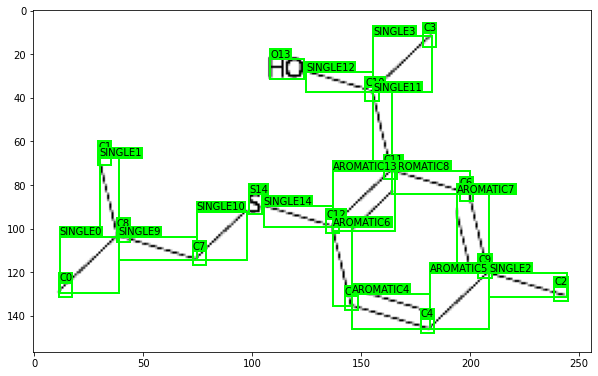

In [6]:
image = cv2.imread(
    f"{PREPROCESSED_DIR}/images/{'/'.join(sample.image_id[:3])}/{sample.image_id}.png"
)
fig, ax = plt.subplots(figsize=(10, 10))
add_bboxes_to_image(ax, image, bboxes, labels)

## 生成画像 + bbox（with noise）

<AxesSubplot:>

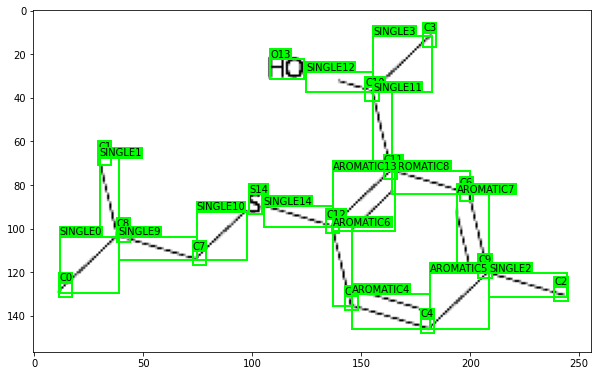

In [7]:
image = cv2.imread(
    f"{PREPROCESSED_DIR}/noised_images/{'/'.join(sample.image_id[:3])}/{sample.image_id}.png"
)
fig, ax = plt.subplots(figsize=(10, 10))
add_bboxes_to_image(ax, image, bboxes, labels)

## SVG

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


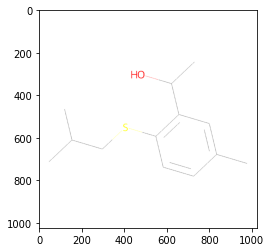

In [8]:
with open(f"{PREPROCESSED_DIR}/svgs/{'/'.join(sample.image_id[:3])}/{sample.image_id}.svg", "rb") as f:
    svg_text = f.read()
png = cairosvg.svg2png(bytestring=svg_text)
image = np.array(Image.open(BytesIO(png)), dtype=np.float32)
plt.imshow(image)